In [7]:
# Quantum computing with Counterfactual Regret Minimization
# Using the principle of cfr
# Calculating quantum probability and trying to predict rock,paper,scissor winning rate/scenarios

import qiskit as qs
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from pandas import DataFrame

In [31]:
# Quantum circuit with 3 qbits and 3 cbits
circuit = qs.QuantumCircuit(3,3)
circuit.x(0)
circuit.h(1)
circuit.x(2)
circuit.cx(1,2)
circuit.ch(0,1)
circuit.measure(0,0)
circuit.measure(1,2)
circuit.measure(2,1)
circuit.draw()

In [32]:
# Ideal probability for r,p,c 
prob = np.array([3.33]*3)
print(prob)

[3.33 3.33 3.33]


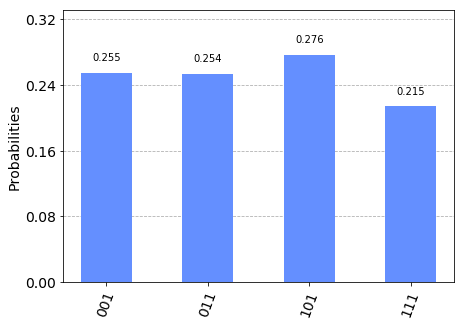

In [41]:
# Visualization
from qiskit.visualization import plot_histogram
# Execute the circuit on the qasm simulator
simulator = qs.Aer.get_backend('qasm_simulator')
job = qs.execute(circuit, simulator, shots=1000)

# Grab results from the job
result = job.result()
# Returns counts
counts = result.get_counts(circuit)
plot_histogram(counts)

        ┌───┐          ┌─┐   
q_0: |0>┤ X ├───────■──┤M├───
        ├───┤     ┌─┴─┐└╥┘┌─┐
q_1: |0>┤ H ├──■──┤ H ├─╫─┤M├
        ├───┤┌─┴─┐└┬─┬┘ ║ └╥┘
q_2: |0>┤ X ├┤ X ├─┤M├──╫──╫─
        └───┘└───┘ └╥┘  ║  ║ 
 c_0: 0 ════════════╬═══╩══╬═
                    ║      ║ 
 c_1: 0 ════════════╩══════╬═
                           ║ 
 c_2: 0 ═══════════════════╩═
                             
